In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
credit=pd.read_csv("C:/Users/dishi/OneDrive/Desktop/PYTHON DATASETS/german_credit_data.csv")
credit.tail(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [3]:
credit.info()
d1 = credit.dropna(axis=0) # dropped nans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [4]:
credit.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV


The distribution of the Age variable is skewed to the right, with the highest frequency of people aged 26.28 asking for a credit
0    27
Name: Age, dtype: int64


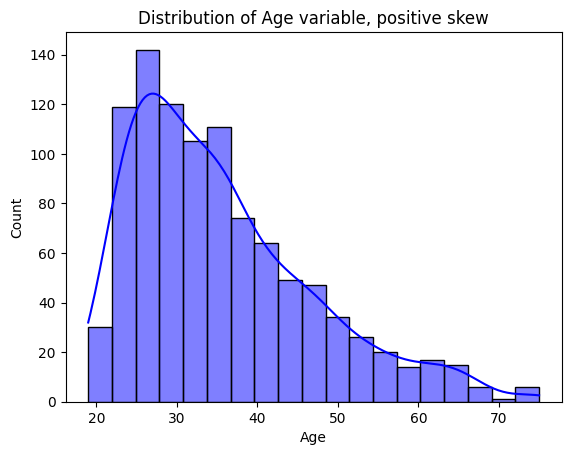

In [5]:
p1=sns.histplot( x=credit['Age'], data=credit, color='blue', kde=True)
p1.set_title('Distribution of Age variable, positive skew')

print('The distribution of the Age variable is skewed to the right, with the highest frequency of people aged 26.28 asking for a credit')
print(credit['Age'].mode() ) # 27 years is the most frequent age in the dataset

In [6]:
credit['Age'].describe() 

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [7]:
credit['Age'].describe() 

x=[] 

# CUSTOM FUNCTION TO CLASSIFY APPLICANTS BY AGE CATEGORY
def agecategory(row):
    if row['Age'] <= 24:
        output='Very young applicant'
    elif row['Age'] > 24 and row['Age'] <= 32:
        output='Young applicant'
    elif row['Age'] > 32 and row['Age'] <= 45:
        output='Early middle age applicant'
    elif row['Age'] > 45 and row['Age'] <= 55:
        output='Late middle age applicant'
    elif row['Age'] > 55 and row['Age'] <= 75:
        output='Senior applicant'
    else:
        output='Error to check'
    return output 

credit['Age category']=credit.apply( agecategory, axis=1)
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age category
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,Senior applicant
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,Very young applicant
2,2,49,male,1,own,little,NaN,2096,12,education,Late middle age applicant
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,Early middle age applicant
4,4,53,male,2,free,little,little,4870,24,car,Late middle age applicant


In [8]:
age_group=credit.groupby('Age category').agg( {'Credit amount':'mean',
                                               'Duration':'mean'})
age_group.reset_index(inplace=True)
credit.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age category
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,Senior applicant
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,Very young applicant


In [9]:
gender_group = credit.groupby(['Sex','Purpose']).agg({'Credit amount': 'mean', 'Duration': 'mean'})

gender_group.reset_index(inplace=True)
gender_group.sort_values(by =['Sex','Credit amount'], ascending=[False, False], inplace=True)
print(gender_group)

       Sex              Purpose  Credit amount   Duration
15    male      vacation/others    7061.222222  28.444444
8     male             business    4392.525641  26.923077
9     male                  car    3922.333333  21.090535
11    male            education    3390.171429  23.885714
12    male  furniture/equipment    3269.112150  20.261682
14    male              repairs    2905.058824  19.941176
13    male             radio/TV    2525.635897  20.225641
10    male  domestic appliances    1586.166667  18.166667
7   female      vacation/others   11653.666667  44.000000
1   female                  car    3369.723404  20.095745
0   female             business    3195.421053  27.000000
4   female  furniture/equipment    2774.729730  17.891892
5   female             radio/TV    2400.517647  19.635294
3   female            education    2134.041667  13.541667
6   female              repairs    2126.400000  16.200000
2   female  domestic appliances    1409.833333  15.500000


In [10]:
age_group=credit.groupby('Age category').agg( {'Credit amount':'mean',
                                               'Duration':'mean'})
age_group.reset_index(inplace=True)
age_group.columns=['Age category','Average credit amount','Average Duration of credit']

age_group.sort_values(by='Average credit amount', ascending=False, inplace=True)

age_group['Average credit amount']=age_group['Average credit amount'].round(decimals=2)
age_group['Average Duration of credit']=age_group['Average Duration of credit'].round(decimals=0)
print(age_group)

                 Age category  Average credit amount  \
2            Senior applicant                3430.44   
0  Early middle age applicant                3387.47   
4             Young applicant                3350.78   
1   Late middle age applicant                3012.44   
3        Very young applicant                2958.76   

   Average Duration of credit  
2                        21.0  
0                        21.0  
4                        22.0  
1                        20.0  
3                        20.0  


In [11]:
credit.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age category
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,Senior applicant
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,Very young applicant


Very young applicants as well as Late middle aged applicants are asking for the smallest credits amongst all groups


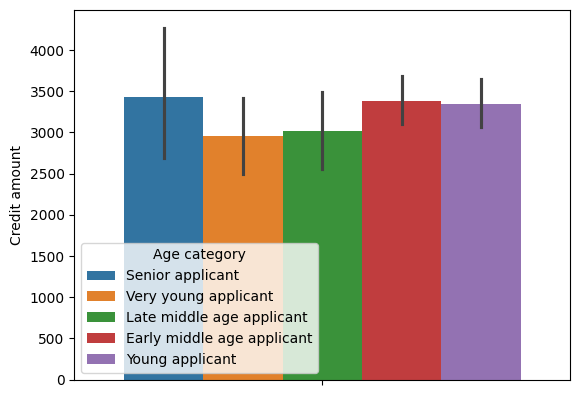

In [12]:
sns.barplot( data=credit, y='Credit amount', estimator='mean', hue='Age category')
print('Very young applicants as well as Late middle aged applicants are asking for the smallest credits amongst all groups')

Average duration amounts vary little amongst age groups, with a higher duration for young applicants and a lower duration for late middle aged applicants


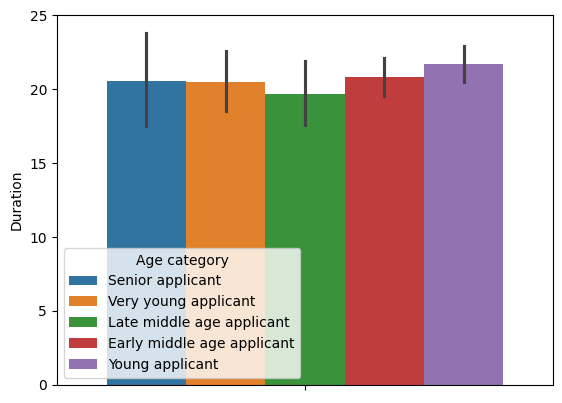

In [13]:
sns.barplot( data=credit, y='Duration', estimator='mean', hue='Age category')
print('Average duration amounts vary little amongst age groups, with a higher duration for young applicants and a lower duration for late middle aged applicants')

In [14]:
credit.head(2)
credit['Saving accounts'].value_counts()
df1=credit[ ~credit.isna().any(axis=1)] # dropping the null values
df1.head(2)

df1['Saving accounts'].value_counts()

def littlesaving(col, v1, **kwargs):
    normalize=kwargs.get('normalize', False)
    if normalize:
        return col.value_counts(normalize=True).get(v1,0)
    else:
        return col.value_counts().get(v1,0)

gr1=pd.DataFrame( df1.groupby('Sex')['Housing'].apply(littlesaving, 'own', normalize=True) )
gr1.reset_index(inplace=True)
gr1

,Sex,Housing
0,female,0.583333
1,male,0.709040


In [15]:
credit.head(2)
gr1=credit.groupby('Sex').agg({'Credit amount':'mean'})
print(gr1) 
print('The credit amount asked for is influenced by the sex of the applicant, with males asking for higher credits in general')

        Credit amount
Sex                  
female    2877.774194
male      3448.040580
The credit amount asked for is influenced by the sex of the applicant, with males asking for higher credits in general


In [16]:
print('How does housing status (own, rent, or free) relate to both the requested credit amount and loan duration, and does it suggest differences in financial stability?')

How does housing status (own, rent, or free) relate to both the requested credit amount and loan duration, and does it suggest differences in financial stability?


In [17]:
credit.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age category
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,Senior applicant
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,Very young applicant


In [18]:
gr3=credit.groupby('Housing').agg({'Credit amount':'mean',
                                   'Duration':'mean'})
gr3.reset_index(inplace=True)
gr3.columns=['Housing','Mean credit','Mean duration']
gr3['Housing']=gr3['Housing'].str.title()

def rounding(df):
    for col in df.columns:
        if df[col].dtype=='float64':
            df[col]=df[col].round(decimals=0)
    return df

gr3=rounding(gr3)
print(gr3)
print('The most distinctive difference is that applicants that live in free housing tend to ask for higher credit amounts as well as longer credit durations')
print('The results for both mean credit and mean duration are relatively simillar when grouped by housing status')

  Housing  Mean credit  Mean duration
0    Free       4906.0           27.0
1     Own       3061.0           20.0
2    Rent       3123.0           19.0
The most distinctive difference is that applicants that live in free housing tend to ask for higher credit amounts as well as longer credit durations
The results for both mean credit and mean duration are relatively simillar when grouped by housing status


<Axes: ylabel='Duration'>

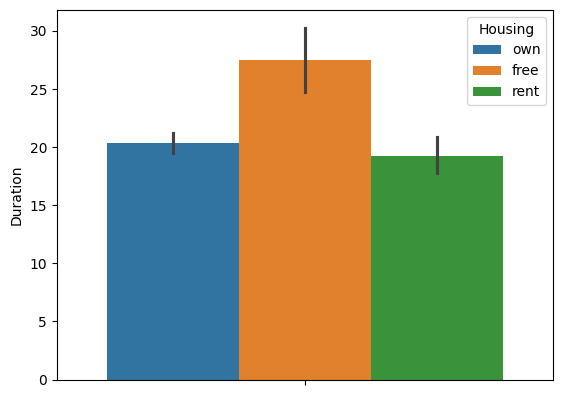

In [19]:
sns.barplot( data=credit, y='Duration', hue='Housing', estimator='mean')

<Axes: ylabel='Credit amount'>

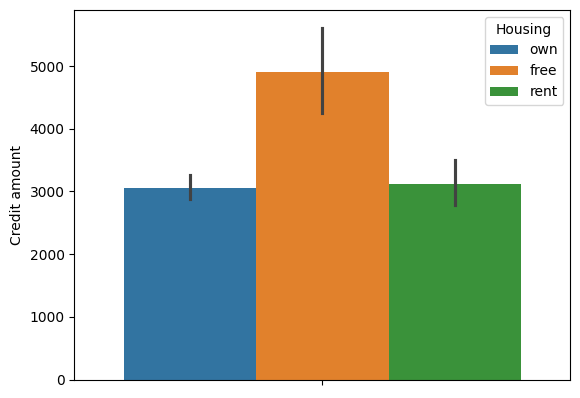

In [20]:
sns.barplot( data=credit, y='Credit amount', hue='Housing', estimator='mean')

In [21]:
credit.head(1)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age category
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,Senior applicant


In [22]:
print('What do the saving accounts and checking accounts data reveal about applicants’ financial behavior, and how do these balances connect with credit amount and loan purpose?')
dff=credit[ ~credit.isna().any(axis=1) ] # we get rid of the rows that have missing data for columns 5 and 6
dff.head(1)

What do the saving accounts and checking accounts data reveal about applicants’ financial behavior, and how do these balances connect with credit amount and loan purpose?


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age category
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,Very young applicant


In [25]:
credit.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age category
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,Senior applicant
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,Very young applicant


In [39]:
credit['Job'].value_counts()
credit['Job']=pd.to_numeric( credit['Job'], errors='coerce')

def resident(row):
    if row['Job'] != 0:
        output='resident'
    else:
        output='non resident'
    return output

credit['Residency']=credit.apply(resident, axis=1)
credit.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age category,Residency
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,Senior applicant,resident
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,Very young applicant,resident


In [49]:
credit['Job']=credit['Job'].astype('object')

jobs=credit.groupby('Job').agg({'Credit amount':'mean',
                                'Duration':'mean'})
jobs.reset_index(inplace=True)
jobs.columns=['Job type','Mean credit amount','Mean credit duration']
jobs=rounding(jobs)
jobs=jobs.sort_values(by=['Mean credit amount','Mean credit duration'], ascending=[True,True])
print(jobs)

print('We can observe a trend where people with better jobs generally ask for a larger loan, as well as a longer repayment period')
print('However, people with job type 0 tend to ask for a higher loan amount that those of type 1, according to the data')

   Job type  Mean credit amount  Mean credit duration
1         1              2359.0                  17.0
0         0              2745.0                  17.0
2         2              3071.0                  21.0
3         3              5435.0                  25.0
We can observe a trend where people with better jobs generally ask for a larger loan, as well as a longer repayment period
However, people with job type 0 tend to ask for a higher loan amount that those of type 1, according to the data


In [83]:
credit.head(2)
credit['Purpose'].value_counts()

credit['Job']=pd.to_numeric( credit['Job'], errors='coerce')

job0=credit[ credit['Job']==0]
job1=credit[ credit['Job']==1]
job2=credit[ credit['Job']==2]
job3=credit[ credit['Job']==3]

p0=job0.groupby('Purpose').agg({'Job':'count'})
p0.reset_index(inplace=True)
p0.columns=['Purpose', 'Requests, job0']
p0

p1=job1.groupby('Purpose').agg({'Job':'count'})
p1.reset_index(inplace=True)
p1.columns=['Purpose', 'Requests, job1']
p1

p2=job2.groupby('Purpose').agg({'Job':'count'})
p2.reset_index(inplace=True)
p2.columns=['Purpose', 'Requests, job2']
p2

p3=job3.groupby('Purpose').agg({'Job':'count'})
p3.reset_index(inplace=True)
p3.columns=['Purpose', 'Requests, job3']
p3

merge1=pd.merge(left=p0, right=p1, left_on='Purpose', right_on='Purpose', how='outer')
merge2=pd.merge(left=merge1, right=p2, left_on='Purpose', right_on='Purpose', how='outer')
merge3=pd.merge(left=merge2, right=p3, left_on='Purpose', right_on='Purpose', how='outer')
merge3.sort_values( by='Purpose', ascending=True, inplace=True)
merge3['Purpose']=merge3['Purpose'].str.title()
merge3['Sum per purpose']=merge3.select_dtypes(include='number').apply('sum', axis=1)
print('Amongst almost all job types, the most common request was a car loan, with the exeption of job type 2, where radio/TV was a more common choice')
print('Domestic appliances and repairs were the 2 groups for which the richest people did not request loans for')
merge3

Amongst almost all job types, the most common request was a car loan, with the exeption of job type 2, where radio/TV was a more common choice
Domestic appliances and repairs were the 2 groups for which the richest people did not request loans for


,Purpose,"Requests, job0","Requests, job1","Requests, job2","Requests, job3",Sum per purpose
0,Business,2,20,60,15.0,97.0
1,Car,12,66,190,69.0,337.0
2,Domestic Appliances,1,1,10,NaN,12.0
3,Education,1,15,35,8.0,59.0
4,Furniture/Equipment,1,33,126,21.0,181.0
5,Radio/Tv,2,57,195,26.0,280.0
6,Repairs,2,7,13,NaN,22.0
7,Vacation/Others,1,1,1,9.0,12.0


It is important to note that education is not high on the list of purposes for loan requests
That said, from all the job groups, it seems that education was most prioritised by group job type 2


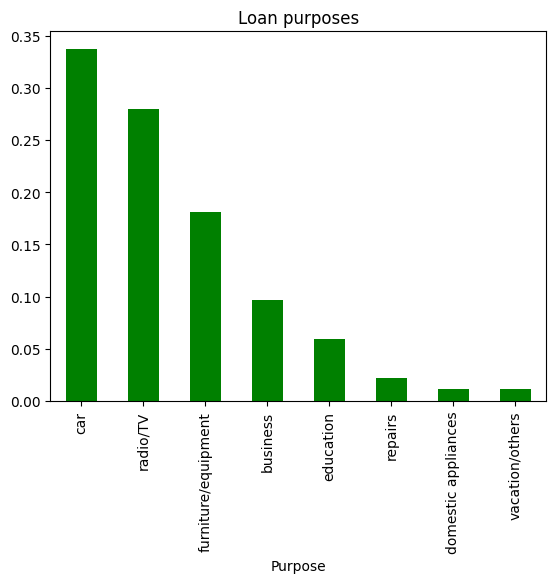

In [87]:
fig2=credit['Purpose'].value_counts(normalize=True).plot( kind='bar', color='green', title='Loan purposes')
print('It is important to note that education is not high on the list of purposes for loan requests')
print('That said, from all the job groups, it seems that education was most prioritised by group job type 2')

In [55]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   object
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Age category      1000 non-null   object
 11  Residency         1000 non-null   object
dtypes: int64(4), object(8)
memory usage: 93.9+ KB


In [56]:
credit['Job'].values

array([2, 2, 1, 2, 2, 1, 2, 3, 1, 3, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 2, 2, 2, 3, 2, 1, 2,
       1, 3, 2, 0, 1, 2, 1, 3, 2, 2, 2, 1, 3, 2, 3, 1, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 3, 1, 3, 3, 2, 2, 1, 2, 2, 2, 1, 1, 1, 3, 2, 2,
       3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 3, 1, 2, 2, 2, 1, 2, 3, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 0, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 1, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3,
       2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 0, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2,
       2, 3, 2, 1, 2, 2, 1, 3, 2, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 1, 1, 3, 0, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 3, 1,
       1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 2, 2, 1,
       2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 1, 2, 2, 0,